<a href="https://colab.research.google.com/github/mandumonster/machinelearning/blob/main/%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/school/3-2/머신러닝/data/vgsales.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# null 값이 포함된 모든 행 삭제
df = df.dropna()

# 결과 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


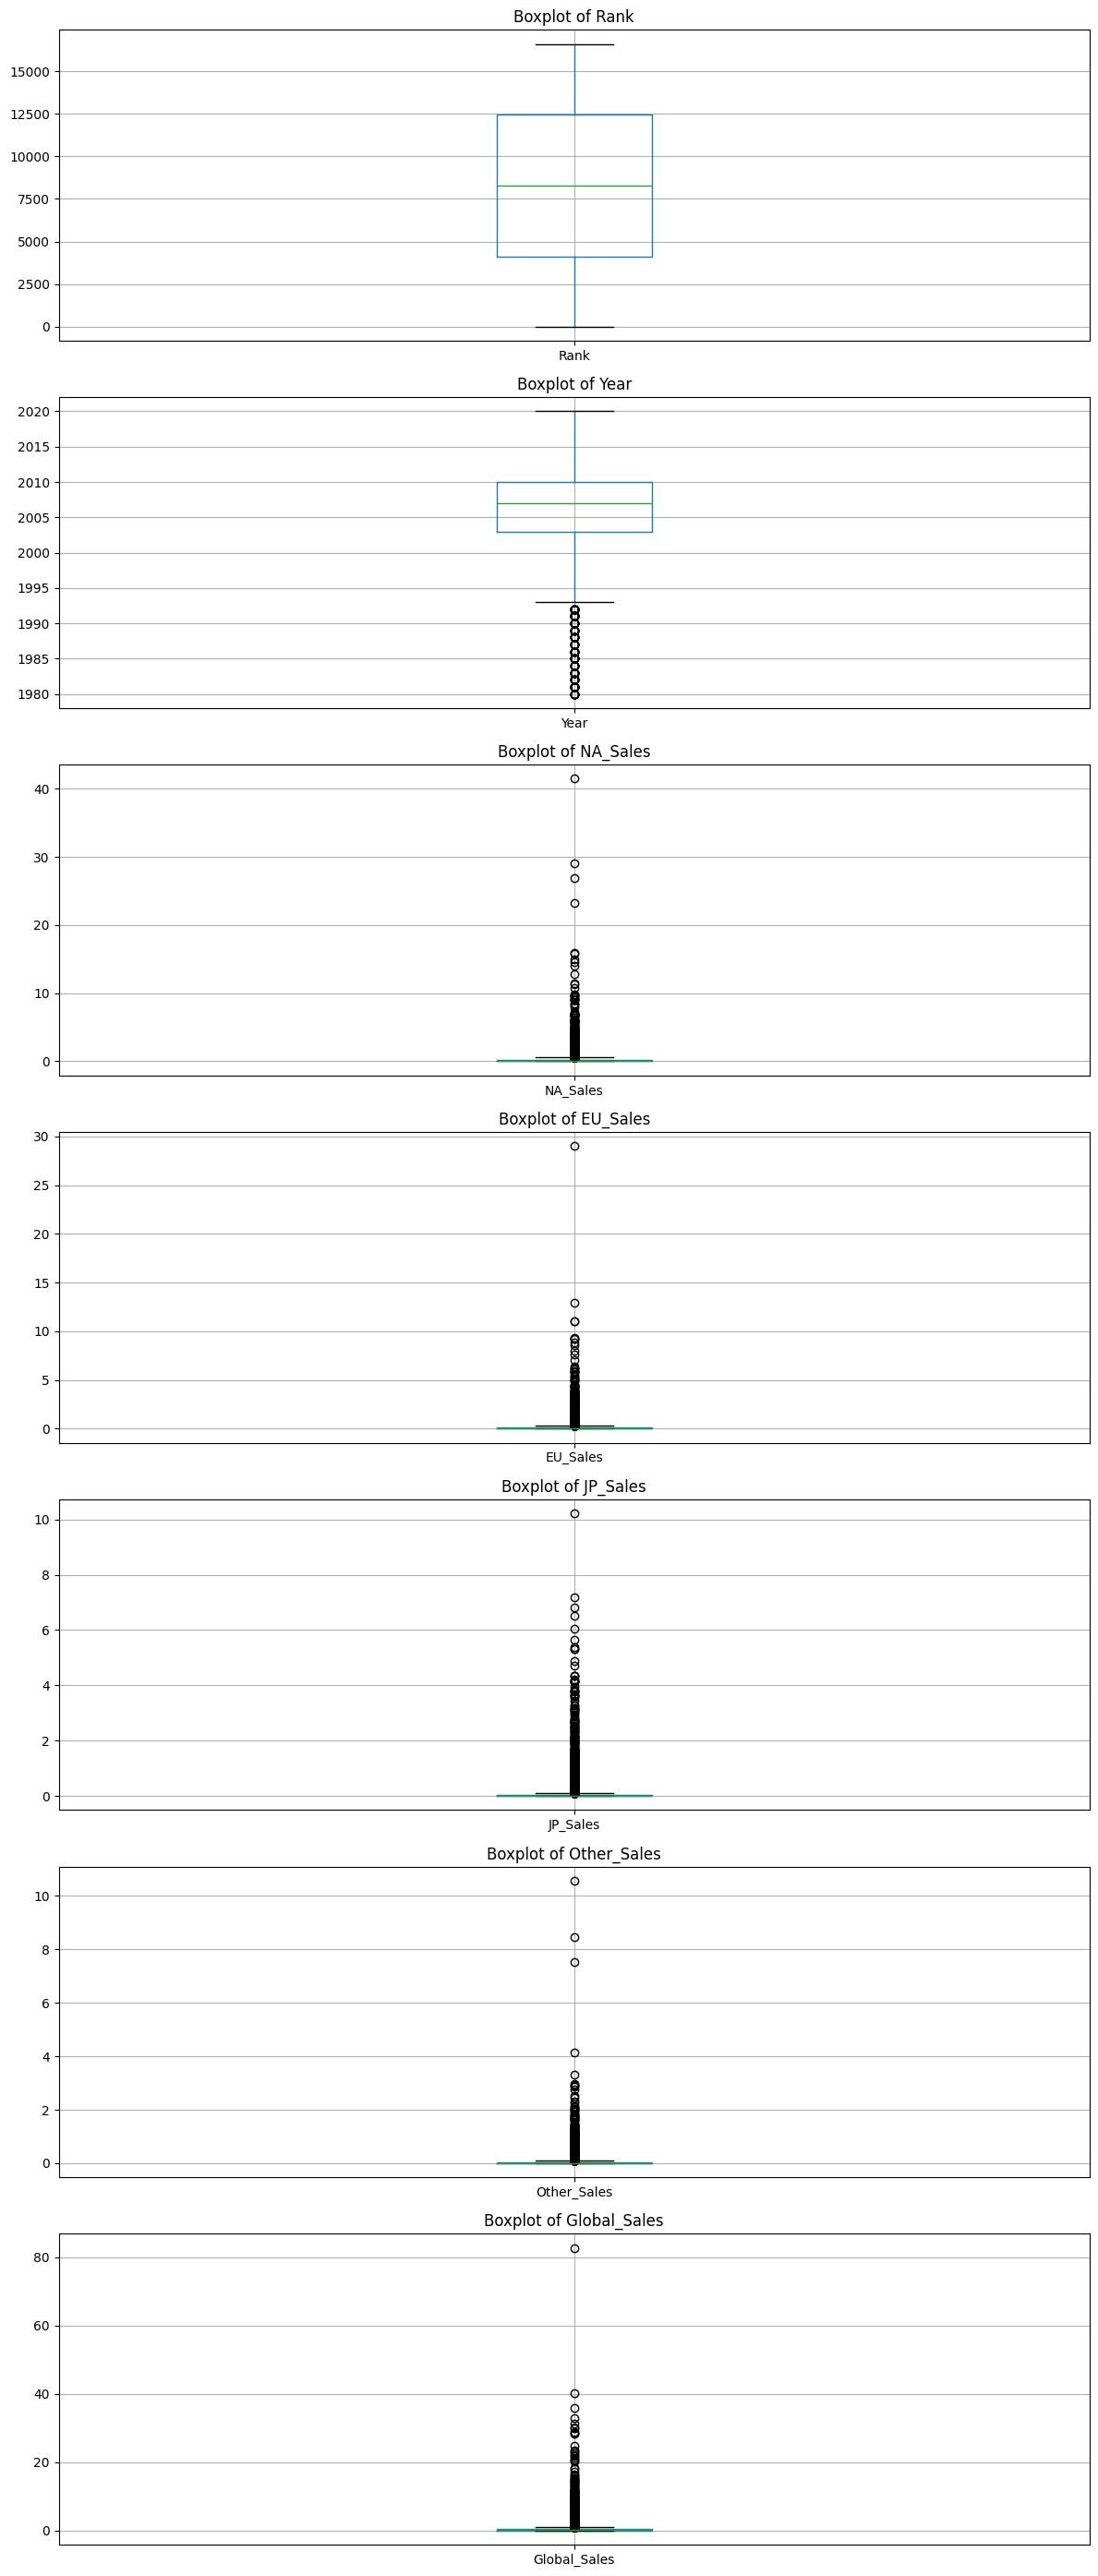

In [ ]:
# 숫자형 데이터 컬럼 선택
num_columns = ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Boxplot 시각화: 개별 플롯 생성
plt.figure(figsize=(12, len(num_columns) * 4))  # 높이 조절
for i, col in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 1, i)  # 행별로 플롯 배치
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()

In [ ]:
# 'Global_Sales' 열에서 80 이상인 값이 있는 행 제거
df = df[df['Global_Sales'] < 80]

In [ ]:
# 새로운 데이터프레임 df_csales 생성
df_csales = df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']]

# 원본 데이터프레임 df에서 해당 열 제거
df = df.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales'])

# 결과 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16290 entries, 1 to 16597
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16290 non-null  int64  
 1   Name          16290 non-null  object 
 2   Platform      16290 non-null  object 
 3   Year          16290 non-null  float64
 4   Genre         16290 non-null  object 
 5   Publisher     16290 non-null  object 
 6   Other_Sales   16290 non-null  float64
 7   Global_Sales  16290 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
# Year 중 2000년 이전의 행 개수 확인

# boxplot에서 1995년과 2000년도 사이의 공백이 보여서 확인해봄
pre_2000_count = df[df['Year'] < 2000].shape[0]
print(f"2000년 이전의 행 개수: {pre_2000_count}개")

2000년 이전의 행 개수: 1974개


In [ ]:
# 원-핫 인코딩
categorical_cols = ['Genre', 'Platform']
encoder = OneHotEncoder(sparse_output=False)

encoded_cats = pd.DataFrame(
    encoder.fit_transform(df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index  # 원본 데이터프레임의 인덱스 유지
)

# 데이터프레임 병합
df = pd.concat([df.drop(columns=categorical_cols), encoded_cats], axis=1)

In [ ]:
# 데이터 표준화
scaler = StandardScaler()
numeric_cols = ['Year', 'Global_Sales']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

장르별 평균 판매량:
                 Genre  Mean Sales
0         Genre_Action   -0.004145
1      Genre_Adventure   -0.246152
2       Genre_Fighting   -0.003292
3           Genre_Misc   -0.047153
4       Genre_Platform    0.288132
5         Genre_Puzzle   -0.077636
6         Genre_Racing    0.040177
7   Genre_Role-Playing    0.064799
8        Genre_Shooter    0.185179
9     Genre_Simulation   -0.053175
10        Genre_Sports   -0.002308
11      Genre_Strategy   -0.194031

ANOVA 검증 결과:
F-statistic: 21.8315, p-value: 7.2580e-45


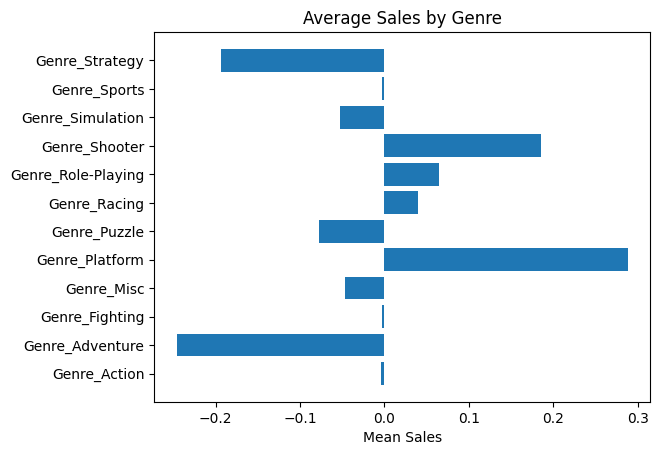

In [ ]:
from scipy.stats import f_oneway

# 원-핫 인코딩된 장르 열 선택
genre_columns = [col for col in df.columns if col.startswith("Genre_")]

# 장르별 평균 판매량 계산
genre_sales = {}
for genre in genre_columns:
    genre_sales[genre] = df.loc[df[genre] == 1, 'Global_Sales'].mean()

# ANOVA 검증 (장르별로 그룹화하여 판매량 차이 검증)
genre_groups = [df.loc[df[genre] == 1, 'Global_Sales'] for genre in genre_columns]
anova_result = f_oneway(*genre_groups)

# 결과 출력
print("장르별 평균 판매량:")
print(pd.DataFrame(list(genre_sales.items()), columns=["Genre", "Mean Sales"]))
print("\nANOVA 검증 결과:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4e}")

# 유의미한 차이가 있다면 시각화
if anova_result.pvalue < 0.05:
    import matplotlib.pyplot as plt
    plt.barh(list(genre_sales.keys()), list(genre_sales.values()))
    plt.xlabel("Mean Sales")
    plt.title("Average Sales by Genre")
    plt.show()

# 머신 러닝 시작

## 가설 1

In [ ]:
# 훈련/테스트 셋 분할
X = df.drop(columns=['Global_Sales', 'Name', 'Publisher'])
y = df['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. 장르별 판매량 분석
genre_cols = [col for col in df.columns if col.startswith('Genre_')]
X_genre = X[genre_cols]  # 장르 관련 열만 선택
y_genre = y

# 모델 훈련
genre_model = LinearRegression()
genre_model.fit(X_genre, y_genre)

# 예측 및 평가
y_pred_genre = genre_model.predict(X_genre)
print("R2 Score (Genre):", r2_score(y_genre, y_pred_genre))
print("MSE (Genre):", mean_squared_error(y_genre, y_pred_genre))

# 장르별 중요도 출력
genre_importance = pd.Series(genre_model.coef_, index=genre_cols)
print("\nGenre Importance:\n", genre_importance.sort_values(ascending=False))

R2 Score (Genre): -0.011938305590545317
MSE (Genre): 1.011938305590545

Genre Importance:
 Genre_Platform       -1.512329e+14
Genre_Misc           -1.512329e+14
Genre_Shooter        -1.512329e+14
Genre_Sports         -1.512329e+14
Genre_Role-Playing   -1.512329e+14
Genre_Action         -1.512329e+14
Genre_Puzzle         -1.512329e+14
Genre_Racing         -1.512329e+14
Genre_Adventure      -1.512329e+14
Genre_Fighting       -1.512329e+14
Genre_Strategy       -1.512329e+14
Genre_Simulation     -1.512329e+14
dtype: float64


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/school/3-2/머신러닝/data/vgsales.csv')

print(df1['Genre'].value_counts())

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


### 결과가 나쁜 이유는 정보의 불균형 때문이었다...

> 개선


Log Transformation: 판매량(Global_Sales)에 로그 변환을 적용하여 분포를 더 정규화하고, 모델이 보다 안정적으로 학습하도록 할 수 있도록 함

In [ ]:
# 원-핫 인코딩된 데이터 정규화
scaler = StandardScaler()
X_genre_scaled = scaler.fit_transform(X_genre)

In [ ]:
# Log Transformation
y_genre_log = np.log1p(y_genre)  # log(1 + value) 변환

# 모델 훈련
genre_model = RandomForestRegressor(n_estimators=100, random_state=42)
genre_model.fit(X_genre_scaled, y_genre_log)

# 예측 및 평가
y_pred_genre_log = genre_model.predict(X_genre_scaled)

# Log 값을 원래 값으로 되돌리기
y_pred_genre = np.expm1(y_pred_genre_log)  # exp(1 + value) 변환

# R2 Score와 MSE 출력
print("R2 Score (Genre):", r2_score(y_genre, y_pred_genre))
print("MSE (Genre):", mean_squared_error(y_genre, y_pred_genre))

# 5. 장르별 중요도 출력
genre_importance = pd.Series(genre_model.feature_importances_, index=genre_cols)
print("\nGenre Importance:\n", genre_importance.sort_values(ascending=False))


R2 Score (Genre): -0.004538566315253734
MSE (Genre): 1.0045385663152535

Genre Importance:
 Genre_Adventure       0.483700
Genre_Platform        0.150034
Genre_Strategy        0.135795
Genre_Shooter         0.117353
Genre_Puzzle          0.046049
Genre_Misc            0.035309
Genre_Simulation      0.017689
Genre_Action          0.005621
Genre_Sports          0.002579
Genre_Role-Playing    0.002334
Genre_Fighting        0.001986
Genre_Racing          0.001551
dtype: float64


In [ ]:
# 1이 많이 나타나는 상위 5개 장르 선택
genre_counts = X[genre_cols].sum(axis=0)  # 각 장르별 1의 합을 계산
top_5_genres = genre_counts.sort_values(ascending=False).head(5).index  # 상위 5개 장르 선택
X_genre_top_5 = X[top_5_genres]  # 상위 5개 장르 특성만 선택

# 상위 5개 장르로 모델 훈련
genre_model_top_5 = LinearRegression()
genre_model_top_5.fit(X_genre_top_5, y_genre)

# 예측 및 평가
y_pred_genre_top_5 = genre_model_top_5.predict(X_genre_top_5)
print("\nR2 Score (Top 5 Genre):", r2_score(y_genre, y_pred_genre_top_5))
print("MSE (Top 5 Genre):", mean_squared_error(y_genre, y_pred_genre_top_5))


R2 Score (Top 5 Genre): 0.00384726629908283
MSE (Top 5 Genre): 0.9961527337009168


## 가설 2

In [ ]:
# 2. 플랫폼별 판매량 분석
platform_cols = [col for col in df.columns if col.startswith('Platform_')]
X_platform = X[platform_cols]  # 플랫폼 관련 열만 선택
y_platform = y

# 랜덤 포레스트 회귀 모델
from sklearn.ensemble import RandomForestRegressor

platform_model = RandomForestRegressor(random_state=42)
platform_model.fit(X_platform, y_platform)

# 예측 및 평가
y_pred_platform = platform_model.predict(X_platform)
print("R2 Score (Platform):", r2_score(y_platform, y_pred_platform))
print("MSE (Platform):", mean_squared_error(y_platform, y_pred_platform))

# 플랫폼별 중요도 출력
platform_importance = pd.Series(platform_model.feature_importances_, index=platform_cols)
print("\nPlatform Importance:\n", platform_importance.sort_values(ascending=False))


R2 Score (Platform): 0.042891690903712476
MSE (Platform): 0.9571083090962873

Platform Importance:
 Platform_NES     0.299335
Platform_GB      0.279399
Platform_X360    0.065673
Platform_PS3     0.043172
Platform_PSP     0.042110
Platform_PSV     0.028862
Platform_PC      0.026257
Platform_PS4     0.024374
Platform_DS      0.021841
Platform_XB      0.020520
Platform_SNES    0.020222
Platform_Wii     0.018388
Platform_GBA     0.014586
Platform_PS2     0.014341
Platform_PS      0.013887
Platform_GC      0.013309
Platform_SAT     0.013088
Platform_N64     0.009962
Platform_GEN     0.006201
Platform_XOne    0.005721
Platform_3DS     0.005510
Platform_2600    0.005104
Platform_WiiU    0.002394
Platform_DC      0.002345
Platform_NG      0.001391
Platform_3DO     0.000519
Platform_SCD     0.000455
Platform_WS      0.000401
Platform_TG16    0.000308
Platform_GG      0.000162
Platform_PCFX    0.000161
dtype: float64


In [ ]:
print(df1['Platform'].value_counts())

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


In [ ]:
# 플랫폼별 1의 합을 계산하여 가장 많이 나타나는 상위 10개 플랫폼 선택
platform_counts = X[platform_cols].sum(axis=0)  # 각 플랫폼별 1의 합을 계산
top_10_platforms = platform_counts.sort_values(ascending=False).head(10).index  # 상위 10개 플랫폼 선택

# 상위 10개 특성만 선택하여 데이터 준비
X_top_10_platforms = X[top_10_platforms]

# 상위 10개 특성으로 모델 훈련
platform_model_top_10 = RandomForestRegressor(random_state=42)
platform_model_top_10.fit(X_top_10_platforms, y_platform)

# 예측 및 평가
y_pred_platform_top_10 = platform_model_top_10.predict(X_top_10_platforms)
print("R2 Score (Top 10 Platform):", r2_score(y_platform, y_pred_platform_top_10))
print("MSE (Top 10 Platform):", mean_squared_error(y_platform, y_pred_platform_top_10))


R2 Score (Top 10 Platform): 0.013766302394814689
MSE (Top 10 Platform): 0.986233697605185


## 가설 3

R2 Score (Year): -0.028368140552651466
MSE (Year): 1.0283681405526512


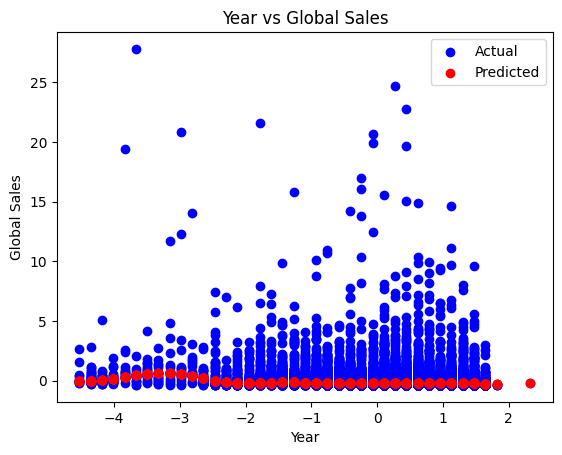

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# 3. 출시 연도와 판매량 분석
X_year = X[['Year']]  # 출시 연도만 사용
y_year = y

# SVR 모델
year_model = SVR(kernel='rbf')
year_model.fit(X_year, y_year)

# 예측 및 평가
y_pred_year = year_model.predict(X_year)
print("R2 Score (Year):", r2_score(y_year, y_pred_year))
print("MSE (Year):", mean_squared_error(y_year, y_pred_year))

# 시각화
plt.scatter(X_year, y_year, color='blue', label='Actual')
plt.scatter(X_year, y_pred_year, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Year vs Global Sales')
plt.legend()
plt.show()

### 결론

데이터셋의 분포가 고르지 않아서 제대로 된 결과를 확인할 수 없었던 것 같다.

# 모든 요소를 종합적으로 고려하여 머신 러닝!

In [ ]:
# 훈련/테스트 셋 분할
X = df.drop(columns=['Global_Sales', 'Name', 'Publisher'])
y = df['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 선형 회귀 모델
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression - R^2 Score:", r2_score(y_test, y_pred_lin))

# 랜덤 포레스트 모델
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_reg.predict(X_test)
print("Random Forest - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R^2 Score:", r2_score(y_test, y_pred_rf))

# 서포트 벡터 회귀 모델
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train, y_train)

# 예측 및 평가
y_pred_svr = svr.predict(X_test)
print("SVR - MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR - R^2 Score:", r2_score(y_test, y_pred_svr))

Linear Regression - MSE: 0.7479168634487182
Linear Regression - R^2 Score: 0.41403485020964204
Random Forest - MSE: 0.01369479880533908
Random Forest - R^2 Score: 0.9892706325722932
SVR - MSE: 0.7008829650581553
SVR - R^2 Score: 0.4508841668416641


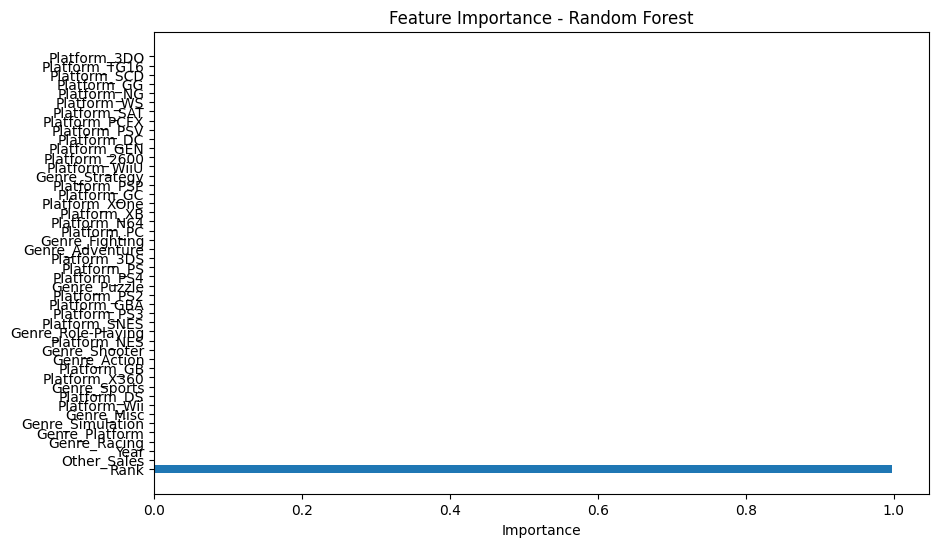

In [ ]:
# 랜덤 포레스트 모델을 학습하고 특성 중요도 계산
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)

# 특성 중요도 추출
feature_importances = rf_reg.feature_importances_

# 특성 중요도에 대한 데이터프레임 생성
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# 중요도가 높은 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

# 번외

# 해외 판매량을 통해 글로벌 판매량을 예측할 수 있을까?

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/school/3-2/머신러닝/data/vgsales.csv')
# null 값이 포함된 모든 행 삭제
df = df.dropna()
# 새로운 데이터프레임 생성
df_new = df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      16291 non-null  float64
 1   EU_Sales      16291 non-null  float64
 2   JP_Sales      16291 non-null  float64
 3   Other_Sales   16291 non-null  float64
 4   Global_Sales  16291 non-null  float64
dtypes: float64(5)
memory usage: 763.6 KB


In [ ]:
# 훈련/테스트 셋 분할
X = df_new.drop(columns=['Global_Sales'])
y = df_new['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 선형 회귀 모델
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression - R^2 Score:", r2_score(y_test, y_pred_lin))

# 랜덤 포레스트 모델
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_reg.predict(X_test)
print("Random Forest - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R^2 Score:", r2_score(y_test, y_pred_rf))

# 서포트 벡터 회귀 모델
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train, y_train)

# 예측 및 평가
y_pred_svr = svr.predict(X_test)
print("SVR - MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR - R^2 Score:", r2_score(y_test, y_pred_svr))

Linear Regression - MSE: 2.8722212446660633e-05
Linear Regression - R^2 Score: 0.9999932860147335
Random Forest - MSE: 0.7236698411897116
Random Forest - R^2 Score: 0.8308379390825942
SVR - MSE: 1.9379949523443198
SVR - R^2 Score: 0.5469823370735825
